/tmp/ipython-input-2835614068.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


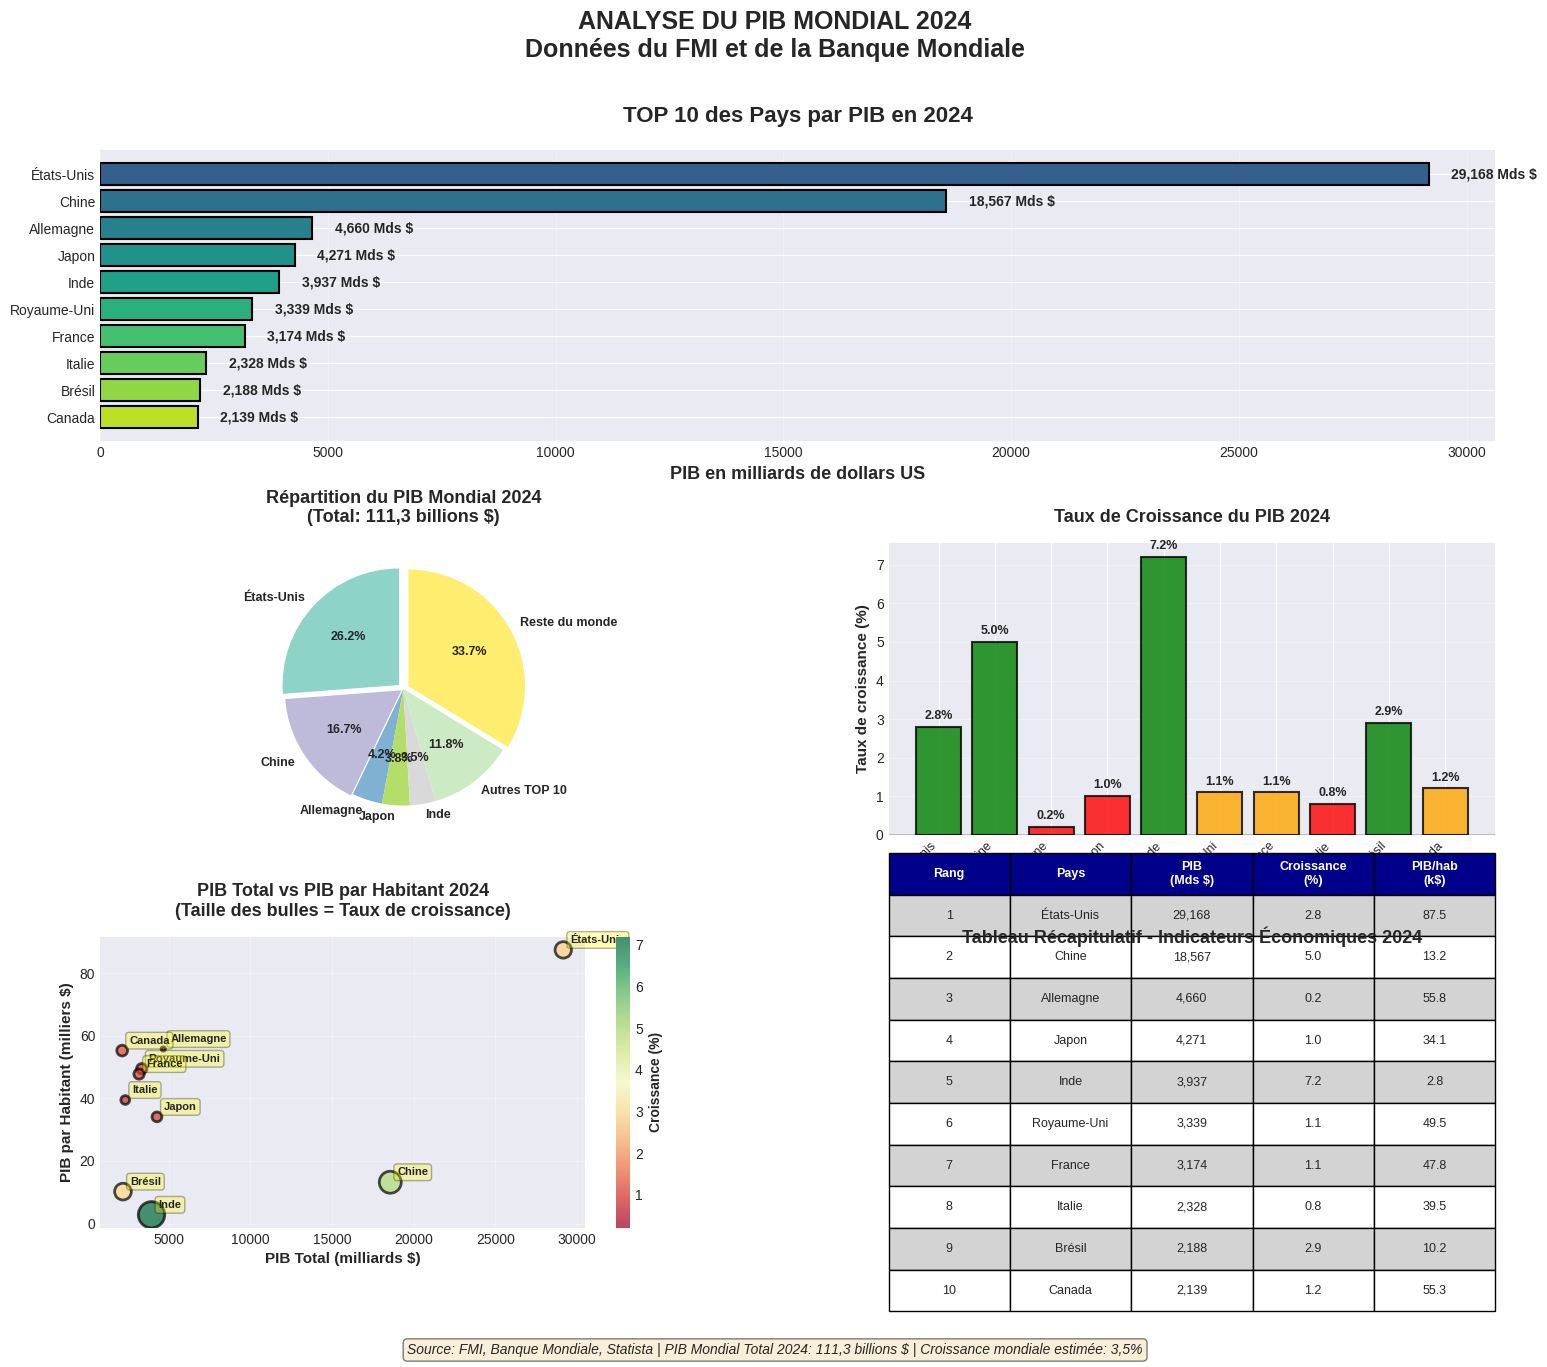

STATISTIQUES CLÉ - PIB MONDIAL 2024

📊 PIB Mondial Total: 111,326.37 milliards de dollars
📈 Part du TOP 10: 66.3% du PIB mondial
🌍 PIB moyen du TOP 10: 7,377.12 milliards $
📉 Écart-type du TOP 10: 8,618.22 milliards $

🚀 Plus forte croissance: Inde (7.2%)
💰 PIB/hab le plus élevé: États-Unis (87.5k$)
🥇 Plus grand PIB: États-Unis (29,167.78 Mds $)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

# Données PIB 2024 (en milliards de dollars US)
pays = ['États-Unis', 'Chine', 'Allemagne', 'Japon', 'Inde',
        'Royaume-Uni', 'France', 'Italie', 'Brésil', 'Canada']
pib_2024 = [29167.78, 18567.0, 4659.93, 4271.0, 3937.0,
            3339.0, 3174.1, 2328.0, 2188.42, 2139.0]

# Taux de croissance estimés 2024 (%)
croissance = [2.8, 5.0, 0.2, 1.0, 7.2, 1.1, 1.1, 0.8, 2.9, 1.2]

# PIB par habitant 2024 (en milliers de dollars)
pib_par_hab = [87.5, 13.2, 55.8, 34.1, 2.8, 49.5, 47.8, 39.5, 10.2, 55.3]

# Création de la figure avec subplots
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# 1. Graphique en barres - TOP 10 PIB
ax1 = fig.add_subplot(gs[0, :])
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(pays)))
bars = ax1.barh(pays, pib_2024, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('PIB en milliards de dollars US', fontsize=13, fontweight='bold')
ax1.set_title('TOP 10 des Pays par PIB en 2024', fontsize=16, fontweight='bold', pad=20)
ax1.invert_yaxis()

# Ajout des valeurs sur les barres
for i, (bar, val) in enumerate(zip(bars, pib_2024)):
    ax1.text(val + 500, bar.get_y() + bar.get_height()/2,
             f'{val:,.0f} Mds $', va='center', fontsize=10, fontweight='bold')

ax1.grid(axis='x', alpha=0.3)

# 2. Graphique à secteurs - Part du PIB mondial
ax2 = fig.add_subplot(gs[1, 0])
total_top10 = sum(pib_2024)
pib_mondial_2024 = 111326.37  # PIB mondial total en milliards
autres = pib_mondial_2024 - total_top10

# Regroupe les plus petits pays
top5 = pib_2024[:5]
autres_top10 = sum(pib_2024[5:])
labels_pie = pays[:5] + ['Autres TOP 10', 'Reste du monde']
values_pie = top5 + [autres_top10, autres]

colors_pie = list(plt.cm.Set3(np.linspace(0, 1, 7)))
explode = (0.05, 0.02, 0, 0, 0, 0, 0.05)

wedges, texts, autotexts = ax2.pie(values_pie, labels=labels_pie, autopct='%1.1f%%',
                                     startangle=90, colors=colors_pie, explode=explode,
                                     textprops={'fontsize': 9, 'weight': 'bold'})
ax2.set_title('Répartition du PIB Mondial 2024\n(Total: 111,3 billions $)',
              fontsize=13, fontweight='bold', pad=15)

# 3. Graphique en barres - Taux de croissance
ax3 = fig.add_subplot(gs[1, 1])
colors_growth = ['green' if x > 2 else 'orange' if x > 1 else 'red' for x in croissance]
bars_growth = ax3.bar(range(len(pays)), croissance, color=colors_growth,
                       edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_xticks(range(len(pays)))
ax3.set_xticklabels(pays, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Taux de croissance (%)', fontsize=11, fontweight='bold')
ax3.set_title('Taux de Croissance du PIB 2024', fontsize=13, fontweight='bold', pad=15)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, (bar, val) in enumerate(zip(bars_growth, croissance)):
    ax3.text(bar.get_x() + bar.get_width()/2, val + 0.2,
             f'{val}%', ha='center', fontsize=9, fontweight='bold')

# 4. Graphique scatter - PIB vs PIB par habitant
ax4 = fig.add_subplot(gs[2, 0])
scatter = ax4.scatter(pib_2024, pib_par_hab, s=[x*50 for x in croissance],
                      c=croissance, cmap='RdYlGn', alpha=0.7,
                      edgecolors='black', linewidth=2)

# Annotations
for i, pays_nom in enumerate(pays):
    ax4.annotate(pays_nom, (pib_2024[i], pib_par_hab[i]),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8, weight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax4.set_xlabel('PIB Total (milliards $)', fontsize=11, fontweight='bold')
ax4.set_ylabel('PIB par Habitant (milliers $)', fontsize=11, fontweight='bold')
ax4.set_title('PIB Total vs PIB par Habitant 2024\n(Taille des bulles = Taux de croissance)',
              fontsize=13, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3)

# Colorbar pour la croissance
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Croissance (%)', fontsize=10, fontweight='bold')

# 5. Tableau comparatif
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('tight')
ax5.axis('off')

# Création du dataframe pour le tableau
df_table = pd.DataFrame({
    'Pays': pays,
    'PIB\n(Mds $)': [f'{x:,.0f}' for x in pib_2024],
    'Croissance\n(%)': [f'{x:.1f}' for x in croissance],
    'PIB/hab\n(k$)': [f'{x:.1f}' for x in pib_par_hab],
    'Rang': list(range(1, 11))
})

# Réorganiser les colonnes
df_table = df_table[['Rang', 'Pays', 'PIB\n(Mds $)', 'Croissance\n(%)', 'PIB/hab\n(k$)']]

table = ax5.table(cellText=df_table.values, colLabels=df_table.columns,
                  cellLoc='center', loc='center',
                  colColours=['lightblue']*5,
                  cellColours=[['lightgray' if i % 2 == 0 else 'white' for _ in range(5)]
                               for i in range(len(df_table))])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

# Style du tableau
for i in range(len(df_table.columns)):
    table[(0, i)].set_facecolor('darkblue')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax5.set_title('Tableau Récapitulatif - Indicateurs Économiques 2024',
              fontsize=13, fontweight='bold', y=0.95)

# Titre général
fig.suptitle('ANALYSE DU PIB MONDIAL 2024\nDonnées du FMI et de la Banque Mondiale',
             fontsize=18, fontweight='bold', y=0.98)

# Ajout d'informations contextuelles
fig.text(0.5, 0.02,
         'Source: FMI, Banque Mondiale, Statista | PIB Mondial Total 2024: 111,3 billions $ | Croissance mondiale estimée: 3,5%',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Statistiques supplémentaires
print("=" * 70)
print("STATISTIQUES CLÉ - PIB MONDIAL 2024")
print("=" * 70)
print(f"\n📊 PIB Mondial Total: {pib_mondial_2024:,.2f} milliards de dollars")
print(f"📈 Part du TOP 10: {(total_top10/pib_mondial_2024)*100:.1f}% du PIB mondial")
print(f"🌍 PIB moyen du TOP 10: {np.mean(pib_2024):,.2f} milliards $")
print(f"📉 Écart-type du TOP 10: {np.std(pib_2024):,.2f} milliards $")
print(f"\n🚀 Plus forte croissance: {pays[croissance.index(max(croissance))]} ({max(croissance)}%)")
print(f"💰 PIB/hab le plus élevé: {pays[pib_par_hab.index(max(pib_par_hab))]} ({max(pib_par_hab):.1f}k$)")
print(f"🥇 Plus grand PIB: {pays[0]} ({pib_2024[0]:,.2f} Mds $)")
print("\n" + "=" * 70)